In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
HT_PRIME_1 = 151
HT_PRIME_2 = 173
NUM_BUCKETS = 53

def hash(str, prime, no_of_buckets) :
    hash = 0
    str_len = len(str)
    for i,c in enumerate(str):
        hash += (prime ** (str_len - (i + 1))) * ord(c)
        hash = hash % no_of_buckets

    return int(hash);

def get_hash(str, no_of_buckets, attempt):
    hash_a = hash(str, HT_PRIME_1, no_of_buckets)
    hash_b = hash(str, HT_PRIME_2, no_of_buckets)
    return (hash_a + (attempt * (hash_b + 1))) % no_of_buckets


print(get_hash("hello", NUM_BUCKETS, 0))

50


In [23]:
def extract_words_from_file(file_path):
    with open(file_path, 'r') as file:
        paragraph = file.read()
    
    words = paragraph.split()
    
    words = [word.strip('.,!?') for word in words]
    
    return words

file_path = 'paragraph.txt'
word_list = extract_words_from_file(file_path)

#word_list


In [24]:
hashes = []

for word in word_list:
    attempt = 0
    while True:
        word_hash = get_hash(word, NUM_BUCKETS, attempt)
        if word_hash not in hashes:
            hashes.append(word_hash)
            break
        attempt += 1
        if attempt >= NUM_BUCKETS:
            break

#hashes

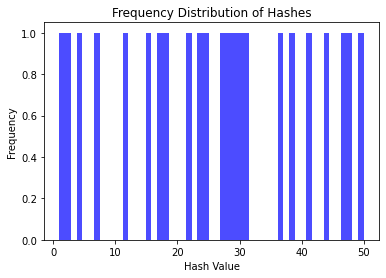

In [25]:
# Plotting the frequency distribution
plt.hist(hashes, bins=NUM_BUCKETS, alpha=0.7, color='blue')
plt.xlabel('Hash Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Hashes')
# plt.grid(True)
plt.show()